## Log data munging and EDA

Just getting set up, testing

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
import sys
sys.path.insert(0,'../')

import mysticbit
from mysticbit import munging, ml, plots

In [42]:
df_logs = munging.load_log_data()
df_logs.head(2)

,PSEUDO_DEPTH,TEMP,CALI,GR,ILD,NPHI,RHOB,DT,TVD,TVDSS,...,PHIE,PHIT,SW,EF,PERFOS,RES_ID,WELL_ID,X,Y,HACKANAME
0,2074.53,87.19,10.31,55.08,3.3128,0.1678,2.3124,108.95,1588.62,1566.62,...,0.0591,0.2066,0.5863,5,0,3005,210075859,15,20.0,B03
1,2074.68,87.20,10.25,52.89,3.6592,0.1739,2.2895,110.91,1588.77,1566.77,...,0.0871,0.2222,0.5225,5,0,3005,210075859,15,20.0,B03


In [43]:
df_ml = munging.create_ml_dataframe(df_logs, label_lags = range(30))
df_ml.head(2)

,HACKANAME,TVDSS,RES_ID,GR,GR_lag_0,GR_lag_2,GR_lag_4,GR_lag_6,GR_lag_8,GR_lag_10,...,GR_futr_20,GR_futr_21,GR_futr_22,GR_futr_23,GR_futr_24,GR_futr_25,GR_futr_26,GR_futr_27,GR_futr_28,GR_futr_29
0,B03,1647,2990.0,46.518571,46.518571,67.614,72.997143,58.240000,59.267143,58.670,...,37.448571,35.2120,37.072500,36.064286,35.3275,35.436,37.430000,49.423333,51.265714,51.104286
1,B03,1648,2900.0,36.295000,36.295000,59.815,73.450000,66.115714,49.070000,71.245,...,35.212000,37.0725,36.064286,35.327500,35.4360,37.430,49.423333,51.265714,51.104286,45.735714


In [55]:
df_ml_train, df_ml_test = ml.train_test_split(df_ml)

Train well:  {'B0700', 'B200', 'G15', 'G16', 'B12', 'G17', 'B14', 'G12', 'G08', 'G09'}
Test wells:  {'B05', 'B06', 'B03'}


In [56]:
X_cols = [c for c in df_ml_train.columns if 'lag' in c]
y_cols = [c for c in df_ml_train.columns if 'futr' in c]

print('X cols: ', X_cols)
print('y cols: ', y_cols)

X cols:  ['GR_lag_0', 'GR_lag_2', 'GR_lag_4', 'GR_lag_6', 'GR_lag_8', 'GR_lag_10', 'GR_lag_12', 'GR_lag_14', 'GR_lag_16', 'GR_lag_18', 'GR_lag_20', 'GR_lag_22', 'GR_lag_24', 'GR_lag_26', 'GR_lag_28', 'GR_lag_30', 'GR_lag_32', 'GR_lag_34', 'GR_lag_36', 'GR_lag_38', 'GR_lag_40', 'GR_lag_42', 'GR_lag_44', 'GR_lag_46', 'GR_lag_48']
y cols:  ['GR_futr_0', 'GR_futr_1', 'GR_futr_2', 'GR_futr_3', 'GR_futr_4', 'GR_futr_5', 'GR_futr_6', 'GR_futr_7', 'GR_futr_8', 'GR_futr_9', 'GR_futr_10', 'GR_futr_11', 'GR_futr_12', 'GR_futr_13', 'GR_futr_14', 'GR_futr_15', 'GR_futr_16', 'GR_futr_17', 'GR_futr_18', 'GR_futr_19', 'GR_futr_20', 'GR_futr_21', 'GR_futr_22', 'GR_futr_23', 'GR_futr_24', 'GR_futr_25', 'GR_futr_26', 'GR_futr_27', 'GR_futr_28', 'GR_futr_29']


In [58]:
from sklearn.ensemble import GradientBoostingRegressor
model_95 = GradientBoostingRegressor(loss='quantile', alpha=0.95)
model_50 = GradientBoostingRegressor(loss='quantile', alpha=0.50)
model_05 = GradientBoostingRegressor(loss='quantile', alpha=0.05)

In [64]:
X_train = df_ml_train[X_cols]
y_train = df_ml_train['GR_futr_1']

model_50.fit(X_train, y_train)


df_pred = df_ml.copy()
X = df_pred[X_cols]

df_pred['GR_futr_1_pred_50'] = model_50.predict(X)
df_pred['GR_futr_1_pred_50'] = model_50.predict(X)
df_pred['GR_futr_1_pred_50'] = model_50.predict(X)

In [65]:
df_pred

,HACKANAME,TVDSS,RES_ID,GR,GR_lag_0,GR_lag_2,GR_lag_4,GR_lag_6,GR_lag_8,GR_lag_10,...,GR_futr_21,GR_futr_22,GR_futr_23,GR_futr_24,GR_futr_25,GR_futr_26,GR_futr_27,GR_futr_28,GR_futr_29,GR_futr_1_pred_50
0,B03,1647,2990.0,46.518571,46.518571,67.614000,72.997143,58.240000,59.267143,58.670000,...,35.212000,37.072500,36.064286,35.327500,35.436000,37.430000,49.423333,51.265714,51.104286,50.945531
1,B03,1648,2900.0,36.295000,36.295000,59.815000,73.450000,66.115714,49.070000,71.245000,...,37.072500,36.064286,35.327500,35.436000,37.430000,49.423333,51.265714,51.104286,45.735714,39.131660
2,B03,1649,2900.0,40.232000,40.232000,46.518571,67.614000,72.997143,58.240000,59.267143,...,36.064286,35.327500,35.436000,37.430000,49.423333,51.265714,51.104286,45.735714,36.080000,46.979800
3,B03,1650,2900.0,38.140000,38.140000,36.295000,59.815000,73.450000,66.115714,49.070000,...,35.327500,35.436000,37.430000,49.423333,51.265714,51.104286,45.735714,36.080000,35.150000,46.810882
4,B03,1651,2900.0,45.875714,45.875714,40.232000,46.518571,67.614000,72.997143,58.240000,...,35.436000,37.430000,49.423333,51.265714,51.104286,45.735714,36.080000,35.150000,34.780000,48.855698
5,B03,1652,2900.0,44.071667,44.071667,38.140000,36.295000,59.815000,73.450000,66.115714,...,37.430000,49.423333,51.265714,51.104286,45.735714,36.080000,35.150000,34.780000,39.475000,45.506421
6,B03,1653,2900.0,42.268571,42.268571,45.875714,40.232000,46.518571,67.614000,72.997143,...,49.423333,51.265714,51.104286,45.735714,36.080000,35.150000,34.780000,39.475000,45.960000,47.336670
7,B05,1743,2900.0,48.350000,48.350000,55.401250,54.608750,46.953750,54.672500,54.178889,...,51.248750,52.545556,58.043333,49.090000,50.627500,52.031111,49.445000,50.783750,48.003333,50.553431
8,B05,1744,2900.0,48.755000,48.755000,48.282222,67.692500,48.795556,56.897500,52.968750,...,52.545556,58.043333,49.090000,50.627500,52.031111,49.445000,50.783750,48.003333,45.451667,51.287503
9,B05,1745,2900.0,53.485000,53.485000,48.350000,55.401250,54.608750,46.953750,54.672500,...,58.043333,49.090000,50.627500,52.031111,49.445000,50.783750,48.003333,45.451667,44.591429,56.284418


In [45]:
# Train model
model = ml.make_model(df_ml_train, X_cols, y_cols)

X cols:  ['GR_lag_0', 'GR_lag_2', 'GR_lag_4', 'GR_lag_6', 'GR_lag_8', 'GR_lag_10', 'GR_lag_12', 'GR_lag_14', 'GR_lag_16', 'GR_lag_18', 'GR_lag_20', 'GR_lag_22', 'GR_lag_24', 'GR_lag_26', 'GR_lag_28', 'GR_lag_30', 'GR_lag_32', 'GR_lag_34', 'GR_lag_36', 'GR_lag_38', 'GR_lag_40', 'GR_lag_42', 'GR_lag_44', 'GR_lag_46', 'GR_lag_48']
y cols:  ['GR_futr_0', 'GR_futr_1', 'GR_futr_2', 'GR_futr_3', 'GR_futr_4', 'GR_futr_5', 'GR_futr_6', 'GR_futr_7', 'GR_futr_8', 'GR_futr_9', 'GR_futr_10', 'GR_futr_11', 'GR_futr_12', 'GR_futr_13', 'GR_futr_14', 'GR_futr_15', 'GR_futr_16', 'GR_futr_17', 'GR_futr_18', 'GR_futr_19', 'GR_futr_20', 'GR_futr_21', 'GR_futr_22', 'GR_futr_23', 'GR_futr_24', 'GR_futr_25', 'GR_futr_26', 'GR_futr_27', 'GR_futr_28', 'GR_futr_29']


In [46]:
df_pred = ml.make_predictions(model, df_ml, X_cols, y_cols)

In [47]:
df_pred.head()

,HACKANAME,TVDSS,RES_ID,GR,GR_lag_0,GR_lag_2,GR_lag_4,GR_lag_6,GR_lag_8,GR_lag_10,...,GR_futr_20_pred,GR_futr_21_pred,GR_futr_22_pred,GR_futr_23_pred,GR_futr_24_pred,GR_futr_25_pred,GR_futr_26_pred,GR_futr_27_pred,GR_futr_28_pred,GR_futr_29_pred
0,B03,1647,2990.0,46.518571,46.518571,67.614000,72.997143,58.240000,59.267143,58.670000,...,67.130262,71.540462,60.678238,74.014548,69.127369,64.010655,70.607262,72.218714,66.525367,58.697357
1,B03,1648,2900.0,36.295000,36.295000,59.815000,73.450000,66.115714,49.070000,71.245000,...,55.032895,63.357500,47.364694,53.677612,60.070574,50.236201,49.483500,57.019315,44.191350,51.228000
2,B03,1649,2900.0,40.232000,40.232000,46.518571,67.614000,72.997143,58.240000,59.267143,...,60.562543,63.937214,62.903742,55.036625,56.925757,72.709202,54.803810,58.603876,58.414595,48.908707
3,B03,1650,2900.0,38.140000,38.140000,36.295000,59.815000,73.450000,66.115714,49.070000,...,47.249938,51.921864,54.107665,56.789120,59.135024,55.096643,51.021238,53.823362,52.456524,62.776571
4,B03,1651,2900.0,45.875714,45.875714,40.232000,46.518571,67.614000,72.997143,58.240000,...,60.807205,60.573383,66.414452,68.127481,61.119090,70.018388,62.720357,62.584464,59.409893,70.740964


In [48]:
well_name = 'B05'
bit_depth = 1800

predictions = munging.get_log_predictions(df_pred, well_name, bit_depth)
predictions

,HACKANAME,TVDSS_bit_depth,pred_col,value,offset,log_name,TVDSS
0,B05,1800,GR_futr_0_pred,47.734455,0.0,GR,1800.0
1,B05,1800,GR_futr_1_pred,51.980369,1.0,GR,1801.0
2,B05,1800,GR_futr_2_pred,60.118595,2.0,GR,1802.0
3,B05,1800,GR_futr_3_pred,52.936400,3.0,GR,1803.0
4,B05,1800,GR_futr_4_pred,60.224119,4.0,GR,1804.0
5,B05,1800,GR_futr_5_pred,58.843971,5.0,GR,1805.0
6,B05,1800,GR_futr_6_pred,68.199738,6.0,GR,1806.0
7,B05,1800,GR_futr_7_pred,60.767738,7.0,GR,1807.0
8,B05,1800,GR_futr_8_pred,66.280048,8.0,GR,1808.0
9,B05,1800,GR_futr_9_pred,72.648321,9.0,GR,1809.0


C:\Users\Connor\AppData\Local\conda\conda\envs\mysticbit\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


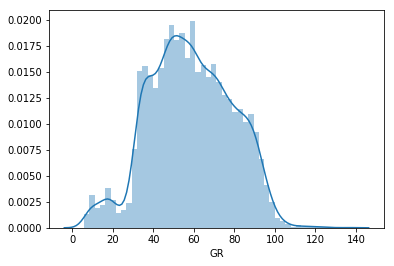

In [54]:
sns.distplot(df_logs.GR)

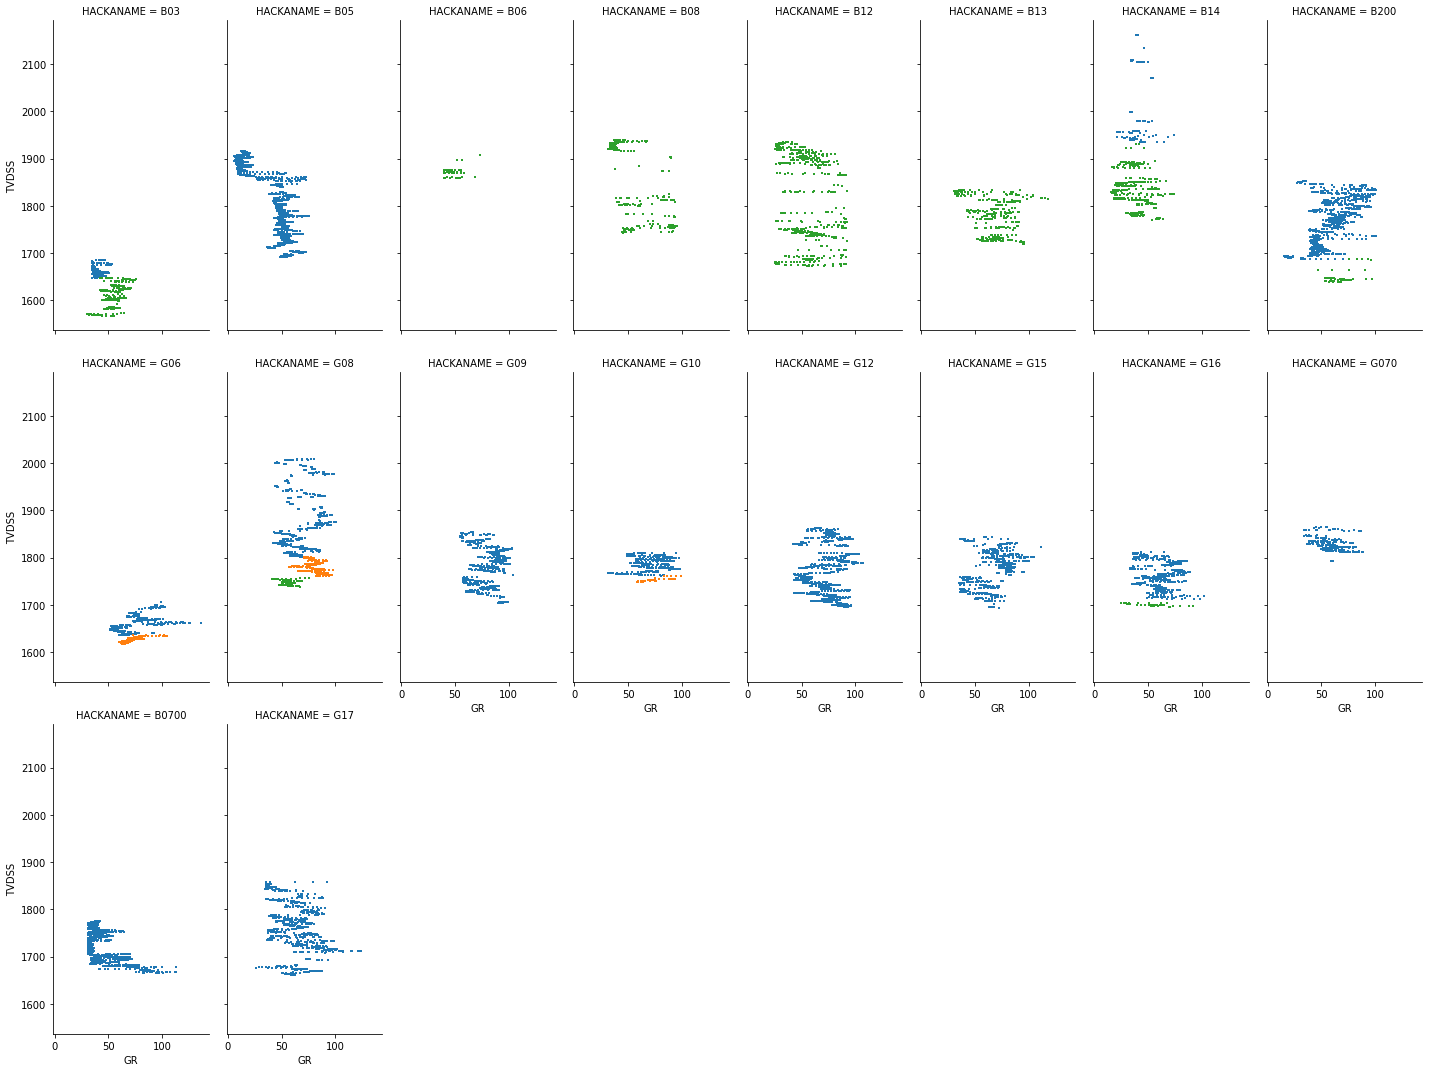

In [53]:
df_plot = df_logs

g = sns.FacetGrid(df_plot, col='HACKANAME', hue='RES_ID', col_wrap=8, aspect=.5, size=5, legend_out=True)
g.map(plt.scatter, 'GR', 'TVDSS', s=2, marker='+')

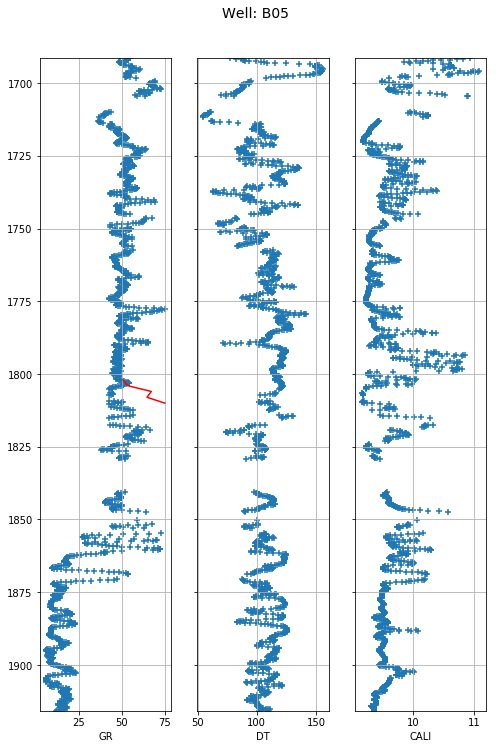

In [22]:
f, ax = plots.make_log_plot(df_logs, 'B05')

for bit in [bit_depth]:
    try:
        predictions = munging.get_log_predictions(df_pred, well_name, bit)
        ax[0].plot(predictions['value'], predictions['TVDSS'], 'red')
    except AssertionError:
        pass